In [1]:
import tensorflow as tf
import os
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [2]:
base_dir='D:/Kaggle/Dataset/Pneumonia/chest_xray/'
train_dir=os.path.join(base_dir,'train')
val_dir=os.path.join(base_dir,'val')
test_dir=os.path.join(base_dir,'test')

train_normal_dir=os.path.join(train_dir,'NORMAL')
train_pneumonia_dir=os.path.join(train_dir,'PNEUMONIA')

val_normal_dir=os.path.join(val_dir,'NORMAL')
val_pneumonia_dir=os.path.join(val_dir,'PNEUMONIA')

test_normal_dir=os.path.join(test_dir,'NORMAL')
test_pneumonia_dir=os.path.join(test_dir,'PNEUMONIA')

Checking one image

In [3]:
image_files = os.listdir(train_normal_dir)

# Choose the first image file
image_file = image_files[0]

# Create the path to the image file
image_path = os.path.join(train_normal_dir, image_file)

# Open and display the image
image = Image.open(image_path)
width,height=image.size
print(width,height)

2090 1858


In [6]:
def create_model():
    model=tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(64,64,3)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256,activation='relu',kernel_regularizer= tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Dense(1,activation='sigmoid')

    ])
    model.compile(loss='binary_crossentropy',
        optimizer=tf.keras.optimizers.Adam(),
        metrics=['accuracy'])
    return model


In [7]:
train_datagen=ImageDataGenerator(rescale=1./255.0, 
                                 shear_range = 0.2,
                                 zoom_range = 0.2,
                                 horizontal_flip = True)
val_datagen=ImageDataGenerator(rescale=1./255.0)
test_datagen=ImageDataGenerator(rescale=1./255.0)

train_generator=train_datagen.flow_from_directory(train_dir,
                                                  batch_size=16,
                                                  class_mode='binary',
                                                  target_size=(64,64)
                                                  )

val_generator=test_datagen.flow_from_directory(val_dir,
                                               batch_size=16,
                                               class_mode='binary',
                                               target_size=(64,64))
test_generator=test_datagen.flow_from_directory(test_dir,
                                                batch_size=16,
                                                class_mode='binary',
                                                target_size=(64,64))

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [8]:
model=create_model()
history=model.fit(train_generator,
                  steps_per_epoch=326,
                  epochs=10,
                  validation_data=val_generator,
                  verbose=1
                  )

Epoch 1/10
326/326 [==============================] - 418s 1s/step - loss: 0.6995 - accuracy: 0.7793 - val_loss: 0.9944 - val_accuracy: 0.6250
Epoch 2/10
326/326 [==============================] - 236s 723ms/step - loss: 0.3568 - accuracy: 0.8731 - val_loss: 0.5272 - val_accuracy: 0.8750
Epoch 3/10
326/326 [==============================] - 217s 666ms/step - loss: 0.3189 - accuracy: 0.8905 - val_loss: 0.5561 - val_accuracy: 0.7500
Epoch 4/10
326/326 [==============================] - 173s 531ms/step - loss: 0.2906 - accuracy: 0.8993 - val_loss: 0.3917 - val_accuracy: 0.9375
Epoch 5/10
326/326 [==============================] - 178s 544ms/step - loss: 0.2806 - accuracy: 0.9072 - val_loss: 0.4820 - val_accuracy: 0.7500
Epoch 6/10
326/326 [==============================] - 198s 607ms/step - loss: 0.2612 - accuracy: 0.9124 - val_loss: 1.4334 - val_accuracy: 0.5625
Epoch 7/10
326/326 [==============================] - 204s 625ms/step - loss: 0.2510 - accuracy: 0.9193 - val_loss: 0.4698 - va

In [11]:
model.evaluate_generator(test_generator,steps=1)

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[0.30529484152793884, 0.875]

In [13]:
def plot_loss_acc(history):
  '''Plots the training and validation loss and accuracy from a history object'''
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'bo', label='Training accuracy')
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')

  plt.figure()

  plt.plot(epochs, loss, 'bo', label='Training Loss')
  plt.plot(epochs, val_loss, 'b', label='Validation Loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

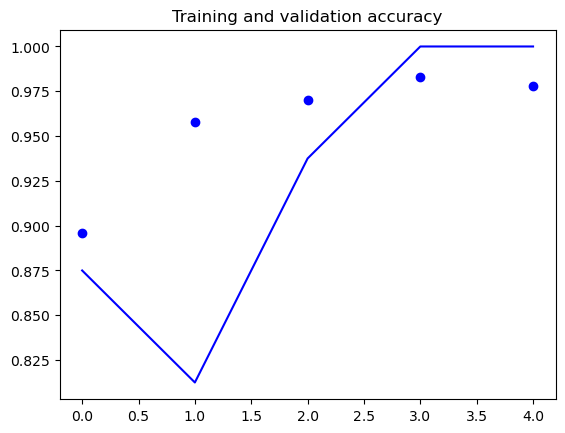

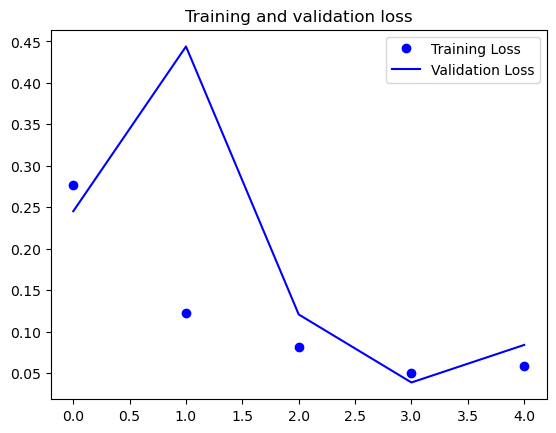

In [11]:
plot_loss_acc(history)